# Optimize the vertical KB mirror at the TES beamline in Shadow3

In [1]:
%run -i ../../../examples/prepare_bluesky.py
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.shadow import tes

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


   kbv_x_rot  kbv_offz    fitness
0  -0.017373  0.161142  30.380012
1   0.007627  0.272253  29.371587
2  -0.067373  0.383364  28.171641
3  -0.092373 -0.061081  27.884283
4  -0.042373 -0.394414  29.207718
5   0.032627 -0.283303  29.231382
6   0.057627  0.050031  27.381577
7   0.082627  0.494475        NaN


('f9086330-959e-423f-bc73-31f5e748b336',)

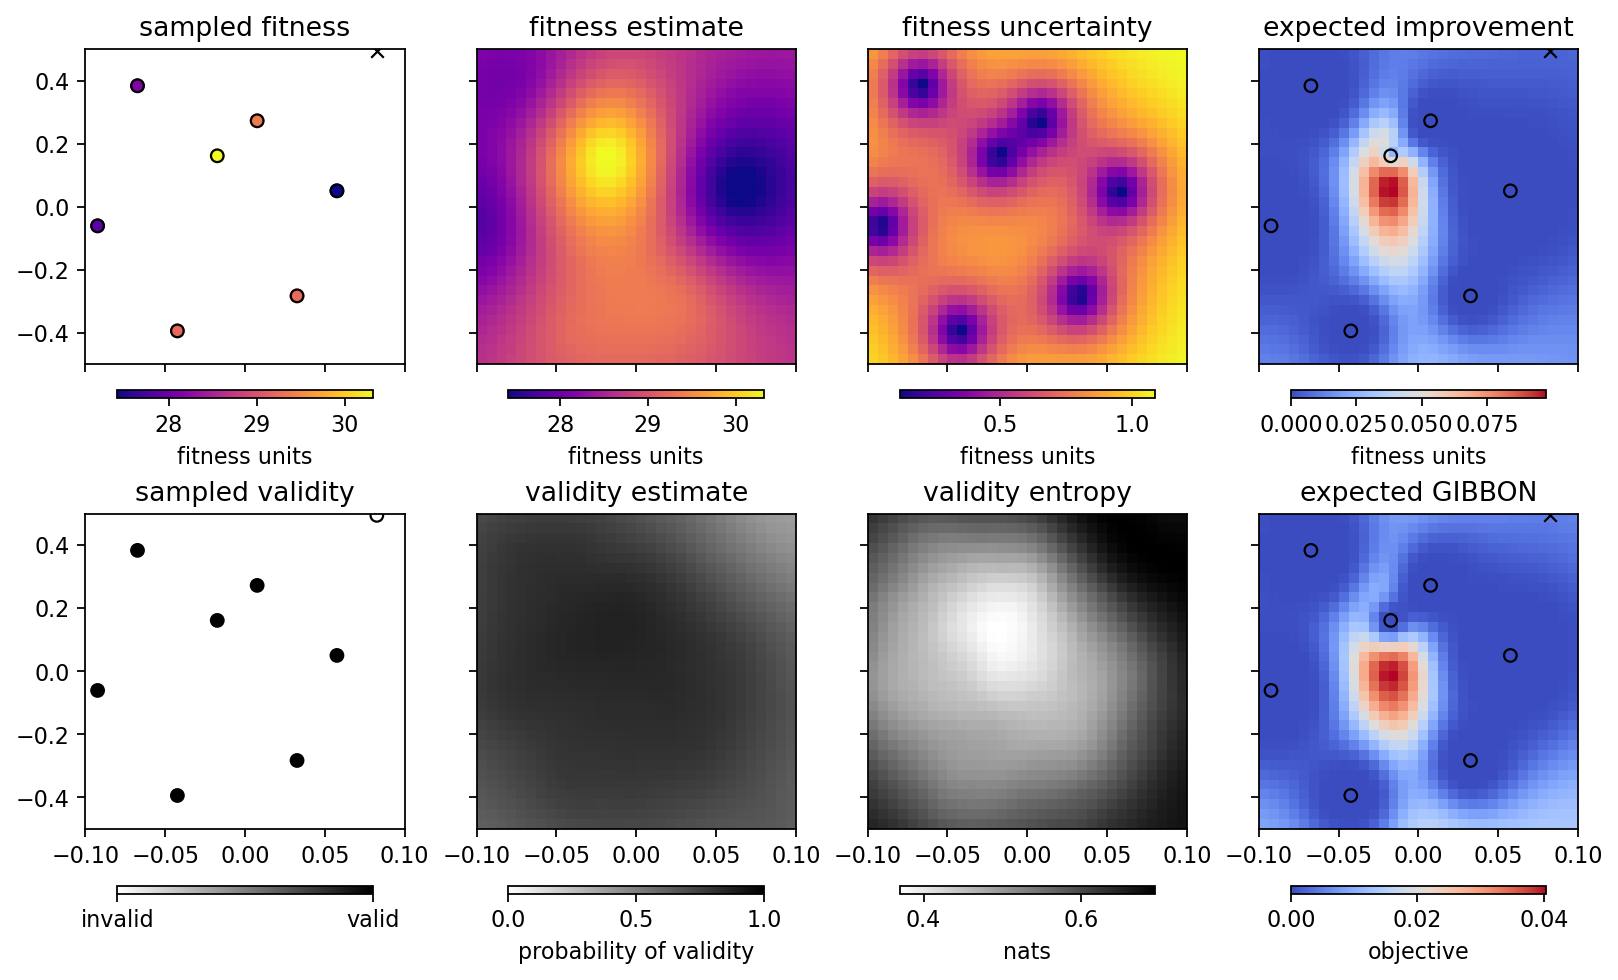

In [3]:
boa.plot_state(gridded=True)

Maximizing the expected improvement:

learning with strategy "eI" ...


    kbv_x_rot  kbv_offz    fitness
8   -0.011558  0.166141  30.578134
9   -0.029371  0.206236  29.741393
10  -0.018194  0.056212  30.350889
11   0.020288 -0.490788  26.715283


    kbv_x_rot  kbv_offz    fitness
12  -0.017290 -0.115747  30.379465
13  -0.005594  0.075643  31.092734
14  -0.017189  0.123433  30.412307
15  -0.099211 -0.490611  28.215275


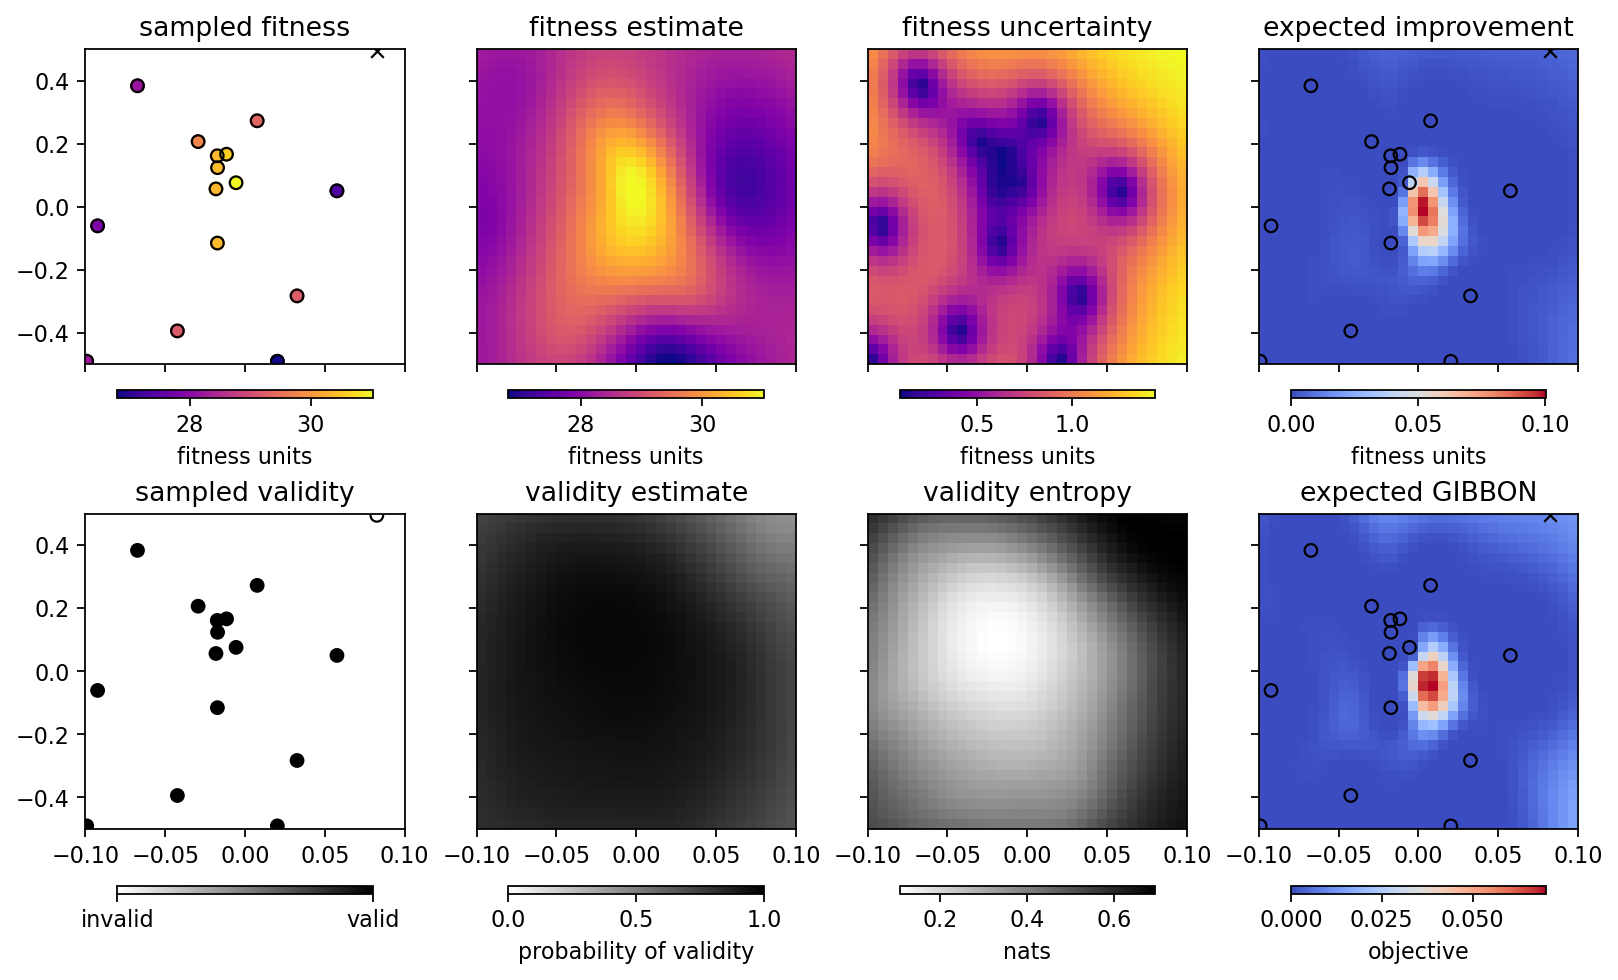

In [4]:
RE(boa.learn(strategy='eI', n_iter=2, n_per_iter=4))
boa.plot_state(gridded=True)